# <font color ='pickle'>**Installing/Importing libraries**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import necessary libraries
import pandas as pd
from pathlib import Path
import sys

# Import the joblib library for saving and loading models
import joblib

# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

In [3]:
!pip install -U nltk -qq
!pip install -U spacy -qq
!python -m spacy download en_core_web_sm -qq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !python -m spacy download en_core_web_sm -qq

    basepath = '/content/drive/MyDrive/NLP_SPAM'
    sys.path.append('/content/drive/MyDrive/NLP_SPAM/custom-functions')
else:
    basepath = 'https://drive.google.com/drive/folders/1KDIfajX7CmlAoqP1qTVOmNtULY06Tvxt?usp=drive_link'
    sys.path.append(
        'https://drive.google.com/drive/folders/1wBkRgh06-wKwTcUbDwdxFqAcOJCsmAdF?usp=drive_link')

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP_SPAM/custom-functions']

In [6]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [7]:
base_folder = Path(basepath)
data_folder = base_folder/'/content/drive/MyDrive/NLP_SPAM/spam.csv'
model_folder = base_folder/'/content/drive/MyDrive/NLP_SPAM'

In [8]:
model_folder.mkdir(exist_ok=True, parents=True)

# <font color ='pickle'>**Load dataset**

In [9]:
data = pd.read_csv('/content/drive/MyDrive/NLP_SPAM/spam.csv', encoding='ISO-8859-1')

In [10]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# Selecting only relevant columns ('label' and 'message') and renaming them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [12]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')


Text(0.5, 1.0, 'Count Plot')

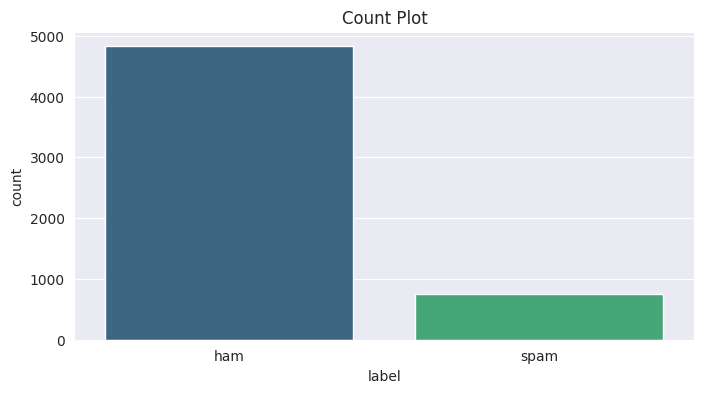

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=data, palette='viridis')

plt.title('Count Plot')

In [17]:
# Converting 'ham' to 0 and 'spam' to 1 (encoding)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data['label']

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [18]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# <font color ='pickle'>**Train-Test Split**

We are asked to take 40% of the training sample and apply the best pipeline to the training set

After evaluating the three pipelines based on the F1 scores of the models, we got the first pipeline, with tf-idf with best F1 score,
F1 score works well on highly imbalanced datasets, especially on Spam detection, so we are proceeding with tf-idf pipeline since it has best F1 score

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.6, random_state = 42)
# the above code splits the training sample to 40% and test sample will be 60%

In [20]:
train.shape

(2228, 2)

In [21]:
test.shape

(3344, 2)

In [22]:
train.head()

,label,message
2725,0,No. But we'll do medical missions to nigeria
41,0,"Did I forget to tell you ? I want you , I need..."
560,0,Hi msg me:)i'm in office..
5296,0,Are u coming to the funeral home
3628,0,Should I head straight there or what


In [23]:
test.head()

,label,message
3245,0,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,0,I sent my scores to sophas and i had to do sec...
1044,1,We know someone who you know that fancies you....
2484,0,Only if you promise your getting out as SOON a...
812,1,Congratulations ur awarded either å£500 of CD ...


# <font color ='pickle'>**Exploratory Data Analysis**

In [24]:
# Printing basic info
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 2725 to 860
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    2228 non-null   int64 
 1   message  2228 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.2+ KB


In [25]:
# Checking distribution of class labels for train dataset
train['label'].value_counts()

,count
label,
0,1927
1,301


In [27]:
# Checking distribution of class labels for test dataset
test['label'].value_counts()

,count
label,
0,2898
1,446


So we can clearly see that this is an imbalnced dataset

# <font color ='pickle'>**Classification Pipeline**

## <font color ='pickle'>**PreProcessing**

In [28]:
X_train = train['message'].values
X_test = test['message'].values
y_train = train['label'].values
y_test = test['label'].values

print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')


X_train: (2228,) y_train: (2228,)
X_test: (3344,) y_test: (3344,)


In [29]:
cp.SpacyPreprocessor??


In [30]:
X_train_cleaned_bow = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_train)

/content/drive/MyDrive/NLP_SPAM/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [31]:
# save  this to a file
file_X_train_cleaned_bow = model_folder / 'X_train_cleaned_bow.pkl'
joblib.dump(X_train_cleaned_bow, file_X_train_cleaned_bow)

['/content/drive/MyDrive/NLP_SPAM/X_train_cleaned_bow.pkl']

In [32]:
X_test_cleaned_bow = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_test)


In [33]:
# save  this to a file
file_X_test_cleaned_bow = model_folder / 'X_test_cleaned_bow.pkl'
joblib.dump(X_test_cleaned_bow, file_X_test_cleaned_bow)


['/content/drive/MyDrive/NLP_SPAM/X_test_cleaned_bow.pkl']

## <font color ='pickle'>**Pipeline 1: Data Preprocessing + Sparse Embeddings (TF-IDF) + ML Model**

### <font color ='pickle'>**Create Pipeline**

In [35]:
final_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(max_iter=10000)),])

### <font color ='pickle'>**Parameter Grid**

In [36]:
final_param_grid_classifier = {'vectorizer__max_features': [1000, 2000, 5000],
                           'classifier__C': [1, 10, 100,]
                           }

### <font color ='pickle'>**Specify Randomized Search**

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
randserch_final_classifier = RandomizedSearchCV(
    final_classifier, final_param_grid_classifier, cv=3)

### <font color ='pickle'>**Fit the model**

In [39]:
# Fit the model on training data
X_train_cleaned_bow= joblib.load(file_X_train_cleaned_bow)
randserch_final_classifier.fit(X_train_cleaned_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vectorizer',
                                              TfidfVectorizer(token_pattern='[\\S]+')),
                                             ('classifier',
                                              LogisticRegression(max_iter=10000))]),
                   param_distributions={'classifier__C': [1, 10, 100],
                                        'vectorizer__max_features': [1000, 2000,
                                                                     5000]})

### <font color = 'pickle'>**Get Best Params**

In [40]:
print(f'Best cross-validation score: {randserch_final_classifier.best_score_:.2f}')
print("\nBest parameters: ", randserch_final_classifier.best_params_)
print("\nBest estimator: ", randserch_final_classifier.best_estimator_)

Best cross-validation score: 0.97

Best parameters:  {'vectorizer__max_features': 5000, 'classifier__C': 100}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, token_pattern='[\\S]+')),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])


### <font color ='pickle'>**Save Model**

In [42]:
file_best_estimator_pipeline1_round1 = model_folder / \
    'pipeline1_round1_best_estimator.pkl'
file_complete_grid_pipeline1_round1 = model_folder / \
    'pipeline1_round1_complete_grid.pkl'

In [43]:
joblib.dump(randserch_final_classifier.best_estimator_,
            file_best_estimator_pipeline1_round1)
joblib.dump(randserch_final_classifier, file_complete_grid_pipeline1_round1)

['/content/drive/MyDrive/NLP_SPAM/pipeline1_round1_complete_grid.pkl']

### <font color ='pickle'>**Load Saved Model**

In [44]:
# load the saved model
best_estimator_pipeline1_round1 = joblib.load(
    file_best_estimator_pipeline1_round1)
complete_grid_pipeline1_round1 = joblib.load(
    file_complete_grid_pipeline1_round1)

### <font color ='pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

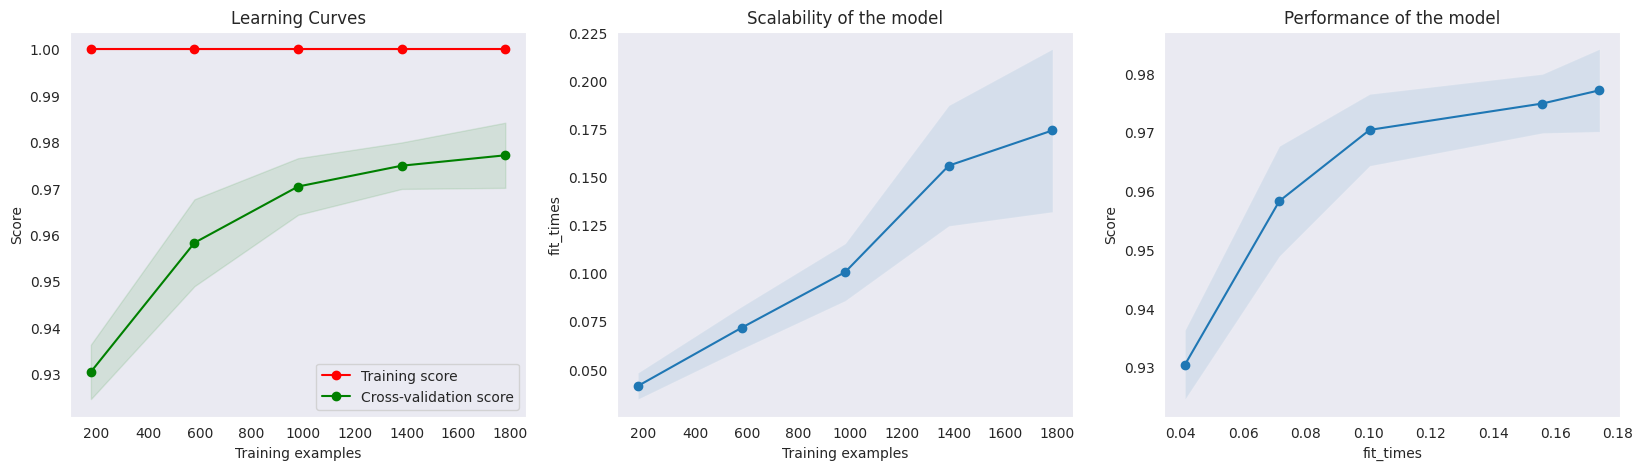

In [45]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline1_round1, 'Learning Curves',
                    X_train_cleaned_bow, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [46]:
# let's check the train scores
print(best_estimator_pipeline1_round1.score(
    X_train_cleaned_bow, y_train))

# let's check the cross validation score
print(complete_grid_pipeline1_round1.best_score_)

1.0
0.9744159021184847


### <font color ='pickle'>**Evaluate model on test datset**

In [47]:
# Final Pipeline
def final_pipeline(text):
    # cleaned_text = cp.SpacyPreprocessor(model='en_core_web_sm').transform(text)
    cleaned_text = joblib.load(file_X_test_cleaned_bow)
    best_estimator_pipeline1_round1 = joblib.load(
        file_best_estimator_pipeline1_round1)
    predictions = best_estimator_pipeline1_round1.predict(cleaned_text)
    return predictions


In [48]:
# predicted values for Test data set
y_test_pred = final_pipeline(X_test)


In [49]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2898
           1       0.97      0.89      0.93       446

    accuracy                           0.98      3344
   macro avg       0.98      0.94      0.96      3344
weighted avg       0.98      0.98      0.98      3344

